In [14]:
# Import necessary packages
import numpy as np
import pandas as pd
import cv2
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import pandas as pd
import json

In [2]:
# Load images
image1 = cv2.imread("/content/CookingAtItsBest.png")  # Change as per your first input image name
image2 = cv2.imread("/content/journal1.jpg")  # Change as per your second input image name


In [3]:
# Hardcoded assigning of output images for the 2 input images
output1_par = image1.copy()
output2_par = image2.copy()


In [4]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [5]:
# Clean the image using Otsu method with the inverted binarized image
ret1, th1 = cv2.threshold(gray1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


In [9]:
# Initialize a dictionary to store bounding box data for JSON output
output_data = {
    "image1": {
        "file_name": "CookingAtItsBest.png",
        "paragraphs": []
    },
    "image2": {
        "file_name": "journal1.jpg",
        "paragraphs": []
    }
}

In [10]:
# Processing paragraph by paragraph boxing
def process_par(thresh, output, image_key):
    # Assign a rectangle kernel size
    kernel = np.ones((5, 5), 'uint8')
    par_img = cv2.dilate(thresh, kernel, iterations=3)

    contours, _ = cv2.findContours(par_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 1)
        # Add bounding box data to JSON output
        output_data[image_key]["paragraphs"].append({
            "x": int(x),
            "y": int(y),
            "width": int(w),
            "height": int(h)
        })

    return output

In [11]:
# Processing and writing the output
output1_par = process_par(th1, output1_par, "image1")
cv2.imwrite("/content/ooutput1_par.jpg", output1_par)
output2_par = process_par(th2, output2_par, "image2")
cv2.imwrite("/content/ooutput2_par.jpg", output2_par)

True

In [31]:
cv2.waitKey(0)


-1

In [15]:
# Save output data as JSON
with open('/content/paragraph_output.json', 'w') as json_file:
    json.dump(output_data, json_file, indent=4)


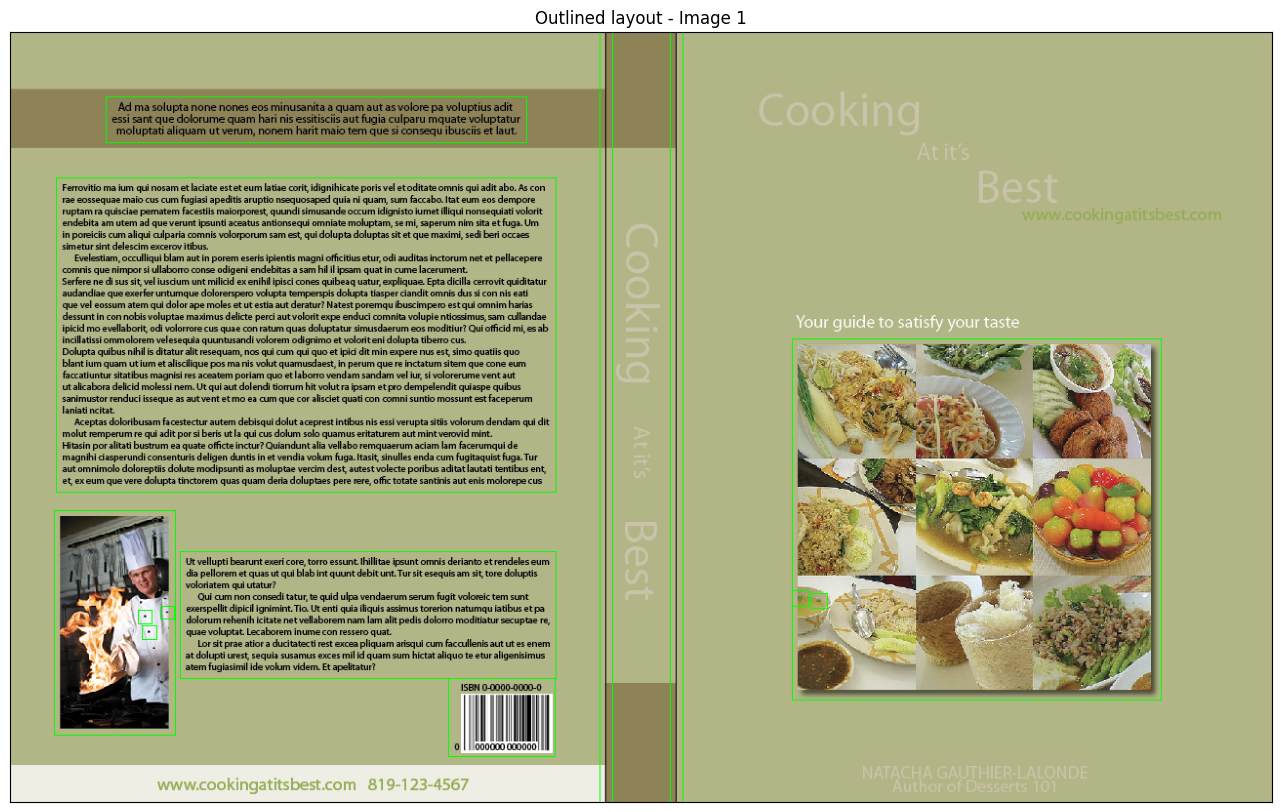

In [29]:
# Optional: Displaying the output images
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(output1_par, cv2.COLOR_BGR2RGB))
plt.title("Outlined layout - Image 1")

# Remove axis labels and ticks
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis

plt.show()


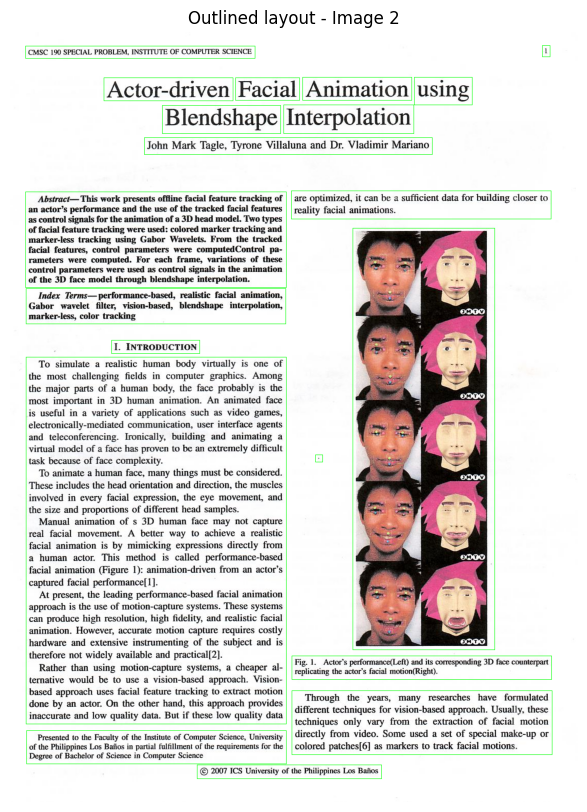

In [30]:
# Optional: Displaying the output images
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(output2_par, cv2.COLOR_BGR2RGB))
plt.title("Outlined layout - Image 2")
plt.axis("off")

# Remove axis labels and ticks
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis
plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis

plt.show()
